In [1]:
%cd C:\Users\dbehera2\Downloads\Risk Project\Virtuoso Risks\Risk Template\risk_template

C:\Users\dbehera2\Downloads\Risk Project\Virtuoso Risks\Risk Template\risk_template


In [6]:
import pandas as pd
import numpy as np
ProjectMetaData = pd.read_excel("Project Master02072020.xlsx")


#ProjectRisks = pd.read_excel("ProjectRisks.xlsx")

In [7]:
ProjectMetaData.columns

Index(['ProjectId', 'Project Name', 'Engagement SID', 'Engagement Name',
       'Project State', 'Project Summary',
       'Project Details Virtuoso Web Page Link', 'Project Status Comment',
       'Overdue Status Flag', 'Status Check-in Compliance',
       ...
       'EAS Schedule End Date', 'YAT Modified Date', 'Delivery TQA Funding',
       'Deal TQA RiskScore', 'Is Delivery TQA Required',
       'Deal Risk Rating Reason', 'CPOD Status',
       'Sum of CPOD is Due in (days)', 'CPOD Last Submitted on', 'Is S400?'],
      dtype='object', length=148)

In [723]:
import warnings
warnings.filterwarnings('ignore')

ProjectRisk = pd.read_excel("riskdata.xlsx", encoding = 'latin-1')

In [724]:
#Change the Name of few columns
ProjectMetaData.rename(columns={'PrimaryProduct(s) - BusinessScenario(s)':"PPBS"},inplace=True)
ProjectMetaData.rename(columns={'Project Manager Ownership':"Ownership"},inplace=True)
ProjectMetaData.columns

Index(['ProjectId', 'Project Name', 'Engagement SID', 'Engagement Name',
       'Project State', 'Project Summary',
       'Project Details Virtuoso Web Page Link', 'Project Status Comment',
       'Overdue Status Flag', 'Status Check-in Compliance',
       ...
       'EAS Schedule End Date', 'YAT Modified Date', 'Delivery TQA Funding',
       'Deal TQA RiskScore', 'Is Delivery TQA Required',
       'Deal Risk Rating Reason', 'CPOD Status',
       'Sum of CPOD is Due in (days)', 'CPOD Last Submitted on', 'Is S400?'],
      dtype='object', length=148)

In [725]:
col =["ProjectId","PPBS","Primed by Domain","Delivery Size (Hours)","Delivery Size (Amount in USD)","Ownership", "Region",
     'Deal Type', 'Project Template Type']

In [726]:
df = ProjectMetaData[col]

In [727]:
df.head()

,ProjectId,PPBS,Primed by Domain,Delivery Size (Hours),Delivery Size (Amount in USD),Ownership,Region,Deal Type,Project Template Type
0,7912,NaN,Business Productivity,529.0,1.605994e+05,Domain,United States,T4,Consulting
1,11382,SQL Server OLTP - Modernization On Prem,Data and AI,2348.0,7.626100e+05,Domain,United States,T4,Consulting
2,26064,"SQL Server - Data Integration & Governance, SQ...",Data and AI,15048.0,2.681989e+06,Domain,Brazil,T4,Consulting
3,24974,Azure Cognitive Services - Data & AI,Data and AI,3009.0,8.346394e+05,Domain,United States,T4,Consulting
4,25765,Azure Infrastructure - Cloud Foundation/Build,Secure Infrastructure,416.0,7.657818e+04,Domain,Belgium,T4,Consulting


# Pre-processing of the data 

In [728]:
# Handle the sicentific notation of amount and then Convert the USD amount to float
df['Delivery Size (Amount in USD)'] = df['Delivery Size (Amount in USD)'].apply(lambda x: '%.2f' % x)
df['Delivery Size (Amount in USD)'] = pd.to_numeric(df['Delivery Size (Amount in USD)'], errors='coerce')

In [729]:
df.head()

,ProjectId,PPBS,Primed by Domain,Delivery Size (Hours),Delivery Size (Amount in USD),Ownership,Region,Deal Type,Project Template Type
0,7912,NaN,Business Productivity,529.0,160599.40,Domain,United States,T4,Consulting
1,11382,SQL Server OLTP - Modernization On Prem,Data and AI,2348.0,762610.00,Domain,United States,T4,Consulting
2,26064,"SQL Server - Data Integration & Governance, SQ...",Data and AI,15048.0,2681988.93,Domain,Brazil,T4,Consulting
3,24974,Azure Cognitive Services - Data & AI,Data and AI,3009.0,834639.38,Domain,United States,T4,Consulting
4,25765,Azure Infrastructure - Cloud Foundation/Build,Secure Infrastructure,416.0,76578.18,Domain,Belgium,T4,Consulting


In [730]:
df.dtypes

ProjectId                          int64
PPBS                              object
Primed by Domain                  object
Delivery Size (Hours)            float64
Delivery Size (Amount in USD)    float64
Ownership                         object
Region                            object
Deal Type                         object
Project Template Type             object
dtype: object

In [731]:
#Check for missing values
df.isnull().sum()

ProjectId                           0
PPBS                             1322
Primed by Domain                    0
Delivery Size (Hours)               0
Delivery Size (Amount in USD)       0
Ownership                           0
Region                              0
Deal Type                          13
Project Template Type               0
dtype: int64

In [732]:
#Replace missing values for PPBS and Deal Type

df['PPBS'].fillna("No info",inplace=True)
df['Deal Type'].fillna("No info", inplace = True)

Create Bins for the numerical variables

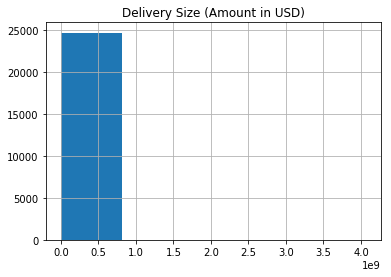

In [733]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist('Delivery Size (Amount in USD)', bins = 5)
plt.show()

In [734]:
df['Delivery Size (Hours)']=df['Delivery Size (Hours)'].astype(int)


# Binning the Delivery Size Variables

In [735]:
def maping(x):
    if x < 100:
        return "less than hundred hours"
    elif x >100 and x <500:
        return "within hundred to five hundred hours"
    elif x >500 and x <1000:
        return "within five hundred to thousand hours"
    elif x >1000 and x <2000:
        return "within thousand to two thousand hours"
    elif x >2000 and x <5000:
        return "within two thousand to five thousand hours"
    elif x >5000 and x <10000:
        return "within five thousand to ten thousand hours"
    else:
        return "above ten thousand hours"

In [736]:
df['Hour maping']=df['Delivery Size (Hours)'].apply(maping)

In [737]:
df.head()

,ProjectId,PPBS,Primed by Domain,Delivery Size (Hours),Delivery Size (Amount in USD),Ownership,Region,Deal Type,Project Template Type,Hour maping
0,7912,No info,Business Productivity,529,160599.40,Domain,United States,T4,Consulting,within five hundred to thousand hours
1,11382,SQL Server OLTP - Modernization On Prem,Data and AI,2348,762610.00,Domain,United States,T4,Consulting,within two thousand to five thousand hours
2,26064,"SQL Server - Data Integration & Governance, SQ...",Data and AI,15048,2681988.93,Domain,Brazil,T4,Consulting,above ten thousand hours
3,24974,Azure Cognitive Services - Data & AI,Data and AI,3009,834639.38,Domain,United States,T4,Consulting,within two thousand to five thousand hours
4,25765,Azure Infrastructure - Cloud Foundation/Build,Secure Infrastructure,416,76578.18,Domain,Belgium,T4,Consulting,within hundred to five hundred hours


In [750]:
#Check for the value counts for each binned hour variable

pd.value_counts(df['Hour maping']).to_frame().reset_index()

,index,Hour maping
0,within hundred to five hundred hours,7401
1,less than hundred hours,4527
2,within five hundred to thousand hours,3759
3,within thousand to two thousand hours,3428
4,within two thousand to five thousand hours,2803
5,above ten thousand hours,1555
6,within five thousand to ten thousand hours,1195


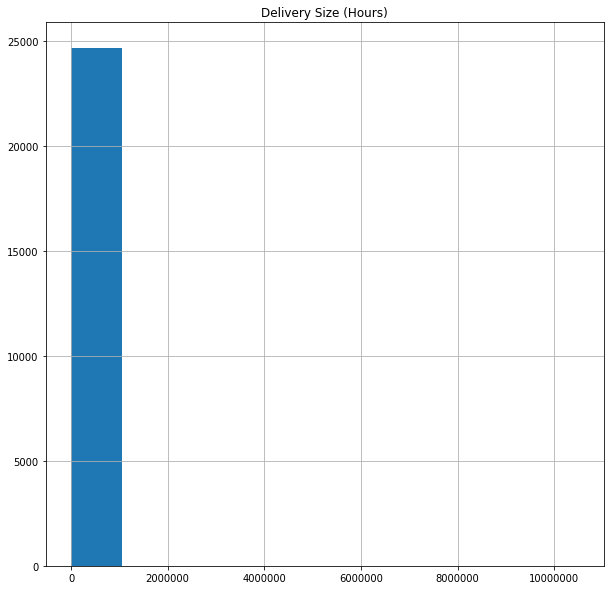

In [739]:
df.hist('Delivery Size (Hours)',figsize = (10,10))
plt.ticklabel_format(style = 'plain')
plt.show()

In [741]:
#What's the max value of the amount variable

df['Delivery Size (Amount in USD)'].max()

4057575758.0

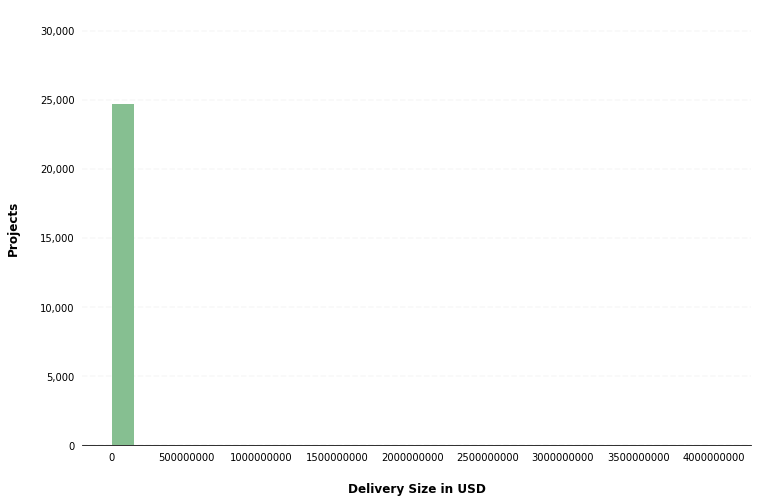

In [742]:
# Plot the variable for better visual understanding

from matplotlib.ticker import StrMethodFormatter
ax = df.hist(column='Delivery Size (Amount in USD)', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.ticklabel_format(style = 'plain')
ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Delivery Size in USD", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Projects", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

Standardising Amount Variable

In [743]:
from sklearn.preprocessing import StandardScaler

In [744]:
#Fit the Standardscaler 
scaler = StandardScaler()

std = df['Delivery Size (Amount in USD)'].values.reshape(-1,1)

scaler.fit_transform(std)

array([[-0.0236648 ],
       [-0.00699188],
       [ 0.04616609],
       ...,
       [-0.02268246],
       [-0.02573243],
       [-0.01117311]])

In [745]:
# create a column for the standarised amount

df['Standardised Amount'] = scaler.fit_transform(std)

In [746]:
df.head()

,ProjectId,PPBS,Primed by Domain,Delivery Size (Hours),Delivery Size (Amount in USD),Ownership,Region,Deal Type,Project Template Type,Hour maping,Standardised Amount
0,7912,No info,Business Productivity,529,160599.40,Domain,United States,T4,Consulting,within five hundred to thousand hours,-0.023665
1,11382,SQL Server OLTP - Modernization On Prem,Data and AI,2348,762610.00,Domain,United States,T4,Consulting,within two thousand to five thousand hours,-0.006992
2,26064,"SQL Server - Data Integration & Governance, SQ...",Data and AI,15048,2681988.93,Domain,Brazil,T4,Consulting,above ten thousand hours,0.046166
3,24974,Azure Cognitive Services - Data & AI,Data and AI,3009,834639.38,Domain,United States,T4,Consulting,within two thousand to five thousand hours,-0.004997
4,25765,Azure Infrastructure - Cloud Foundation/Build,Secure Infrastructure,416,76578.18,Domain,Belgium,T4,Consulting,within hundred to five hundred hours,-0.025992


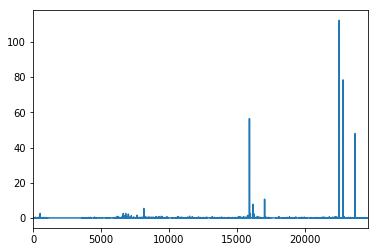

In [747]:
df['Standardised Amount'].plot(kind= 'line')
plt.show()

In [748]:
df['Delivery Size (Amount in USD)'].values.reshape(-1,1)

array([[ 160599.4 ],
       [ 762610.  ],
       [2681988.93],
       ...,
       [ 196069.04],
       [  85943.51],
       [ 611638.12]])

Binning Amount Variable

In [751]:
def bin_amount(x):
    if x < 100:
        return "less than hundred dollar"
    elif x >100 and x <10000:
        return "less than ten thousand dollar"
    elif x >10000 and x <100000:
        return "less than hundred thousand dollar"
    elif x >100000 and x <1000000:
        return "less than million dollar"
    elif x >1000000 and x <10000000:
        return "less than ten million dollar"
    elif x >10000000 and x <50000000:
        return "less than fifty million dollar"
    else:
        return "greater than fifty million dollar"

In [752]:
#Create a new column for binned amount variable by applying above function to Delivery size amount variable

df['Amount maping'] = df['Delivery Size (Amount in USD)'].apply(bin_amount)

In [753]:
df.head()

,ProjectId,PPBS,Primed by Domain,Delivery Size (Hours),Delivery Size (Amount in USD),Ownership,Region,Deal Type,Project Template Type,Hour maping,Standardised Amount,Amount maping
0,7912,No info,Business Productivity,529,160599.40,Domain,United States,T4,Consulting,within five hundred to thousand hours,-0.023665,less than million dollar
1,11382,SQL Server OLTP - Modernization On Prem,Data and AI,2348,762610.00,Domain,United States,T4,Consulting,within two thousand to five thousand hours,-0.006992,less than million dollar
2,26064,"SQL Server - Data Integration & Governance, SQ...",Data and AI,15048,2681988.93,Domain,Brazil,T4,Consulting,above ten thousand hours,0.046166,less than ten million dollar
3,24974,Azure Cognitive Services - Data & AI,Data and AI,3009,834639.38,Domain,United States,T4,Consulting,within two thousand to five thousand hours,-0.004997,less than million dollar
4,25765,Azure Infrastructure - Cloud Foundation/Build,Secure Infrastructure,416,76578.18,Domain,Belgium,T4,Consulting,within hundred to five hundred hours,-0.025992,less than hundred thousand dollar


In [754]:
df.loc[df['Delivery Size (Amount in USD)'] == df['Delivery Size (Amount in USD)'].max()]

,ProjectId,PPBS,Primed by Domain,Delivery Size (Hours),Delivery Size (Amount in USD),Ownership,Region,Deal Type,Project Template Type,Hour maping,Standardised Amount,Amount maping
22559,4725,SharePoint - Productivity Solutions,Business Productivity,175,4.057576e+09,TBD,Nordics,T5,Consulting,within hundred to five hundred hours,112.348074,greater than fifty million dollar


In [755]:
#Convert the numeric to string to train the model
df.dtypes

ProjectId                          int64
PPBS                              object
Primed by Domain                  object
Delivery Size (Hours)              int32
Delivery Size (Amount in USD)    float64
Ownership                         object
Region                            object
Deal Type                         object
Project Template Type             object
Hour maping                       object
Standardised Amount              float64
Amount maping                     object
dtype: object

# Train the Model

In [756]:
from gensim.models import FastText

# make the index as Project ID

ProjectDetails = df.set_index('ProjectId')

In [757]:
ProjectDetails.head()

,PPBS,Primed by Domain,Delivery Size (Hours),Delivery Size (Amount in USD),Ownership,Region,Deal Type,Project Template Type,Hour maping,Standardised Amount,Amount maping
ProjectId,,,,,,,,,,,
7912,No info,Business Productivity,529,160599.40,Domain,United States,T4,Consulting,within five hundred to thousand hours,-0.023665,less than million dollar
11382,SQL Server OLTP - Modernization On Prem,Data and AI,2348,762610.00,Domain,United States,T4,Consulting,within two thousand to five thousand hours,-0.006992,less than million dollar
26064,"SQL Server - Data Integration & Governance, SQ...",Data and AI,15048,2681988.93,Domain,Brazil,T4,Consulting,above ten thousand hours,0.046166,less than ten million dollar
24974,Azure Cognitive Services - Data & AI,Data and AI,3009,834639.38,Domain,United States,T4,Consulting,within two thousand to five thousand hours,-0.004997,less than million dollar
25765,Azure Infrastructure - Cloud Foundation/Build,Secure Infrastructure,416,76578.18,Domain,Belgium,T4,Consulting,within hundred to five hundred hours,-0.025992,less than hundred thousand dollar


In [758]:
# Drop the columns which are not required for the training of vector model

ProjectDetails.drop(['Delivery Size (Hours)','Delivery Size (Amount in USD)','Standardised Amount'], axis = 1, inplace  = True)

In [759]:
ProjectDetails.isnull().sum()

PPBS                     0
Primed by Domain         0
Ownership                0
Region                   0
Deal Type                0
Project Template Type    0
Hour maping              0
Amount maping            0
dtype: int64

In [760]:
ProjectDetails.head()

,PPBS,Primed by Domain,Ownership,Region,Deal Type,Project Template Type,Hour maping,Amount maping
ProjectId,,,,,,,,
7912,No info,Business Productivity,Domain,United States,T4,Consulting,within five hundred to thousand hours,less than million dollar
11382,SQL Server OLTP - Modernization On Prem,Data and AI,Domain,United States,T4,Consulting,within two thousand to five thousand hours,less than million dollar
26064,"SQL Server - Data Integration & Governance, SQ...",Data and AI,Domain,Brazil,T4,Consulting,above ten thousand hours,less than ten million dollar
24974,Azure Cognitive Services - Data & AI,Data and AI,Domain,United States,T4,Consulting,within two thousand to five thousand hours,less than million dollar
25765,Azure Infrastructure - Cloud Foundation/Build,Secure Infrastructure,Domain,Belgium,T4,Consulting,within hundred to five hundred hours,less than hundred thousand dollar


In [761]:
#Create a corpus list for entire dataframe to give as input to FastText model

projects =[]
for index,row in ProjectDetails.iterrows():  
    projects.append(list(row))

In [763]:
projects[24667]

['Dynamics CRM On Prem - Customer Service',
 'Business Applications',
 'Domain',
 'China',
 'T3',
 'Consulting',
 'within five thousand to ten thousand hours',
 'less than million dollar']

In [253]:
embedding_size = 50
window_size = 3
min_word = 2
down_sampling = 1e-2

model_ted = FastText(projects,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      hs = 1,
                      workers = 4,
                      sg=1,
                      iter=100)

#model_ted = FastText(projects, size=50, window=3, min_count=2, workers=4,sg=1)

#model_ted.wv.most_similar('SharePoint - Adoption Services',topn=5)

#len(model_ted.wv.vocab)

model_ted['SharePoint - Adoption Services']

array([-0.67070574,  0.23293328,  0.8096893 , -0.31337687,  0.3992726 ,
        0.31424487,  0.06128465,  0.7949125 ,  0.05345371,  0.26086512,
       -0.42546928, -0.06504484,  1.127455  ,  0.3985966 , -0.89601755,
       -0.41711393,  0.03592535,  0.3749466 , -0.31327155,  0.39752194,
       -0.05422807,  1.2394999 , -0.03455956, -0.09035049,  0.7846421 ,
       -0.14772917, -0.65625787, -0.13199629,  0.43620312,  0.26863742,
        1.1802684 , -0.7224267 ,  0.46502137, -0.27620423, -0.00533623,
       -0.80715364, -0.03502219, -0.6761775 , -0.7862831 ,  0.7242688 ,
        0.646832  , -0.3910156 , -0.6028264 , -0.6592321 , -0.86094385,
        0.96620655, -0.6506177 , -0.13627197,  0.28762403,  0.7469711 ],
      dtype=float32)

In [254]:
model_ted.save("similarproject.bin")

In [768]:
# The model is saved as "similarproject.bin" and further loaded back in below code to compute the word embeddings

In [695]:
mod = FastText.load('similarproject.bin')

In [769]:
model_ted.wv.most_similar('Office 365 - Security/Identity Services',topn=5)

[('Azure AD - Security/Identity Services, Office 365 - Security/Identity Services',
  0.9297451376914978),
 ('Office 365 - M365 E5 Security & Compliance, Office 365 - Security/Identity Services',
  0.9255391955375671),
 ('Office 365 - Productivity Solutions, Office 365 - Security/Identity Services',
  0.9230313301086426),
 ('Cybersecurity Services - Cyber Assessment, Office 365 - Security/Identity Services',
  0.8970822691917419),
 ('Exchange - OnPremises Implementation', 0.8957210183143616)]

In [797]:
def compute_embeddings(x):
    vector = []
    for word in x:
        vector.append(model_ted[word])
    vector = np.array(vector)    
    vector_sum = vector.sum(axis=0)
    return vector_sum/np.sqrt((vector_sum**2).sum())


projcts = [compute_embeddings(sen) for sen in projects]

In [798]:
# create a dictionary of Project Id
indexes = list(ProjectDetails.index)
projcts = np.array(projcts)

project_dict ={}
for index,ele in enumerate(indexes):
    project_dict[index] = ele
    

In [803]:
EPSILON = 1e-07
def cosine_similarities(x,embeddings):
    dot_pdt = np.dot(embeddings, x)
    norms = np.linalg.norm(x) * np.linalg.norm(embeddings,axis = 1)
    return dot_pdt / (norms + EPSILON)
        



def most_similar(idx, embeddings,top_n=10,euclidian= False):
    if euclidian:
        # eucliedian distance between idx and the rest
        distance = euclidean_distances(embeddings[idx],embeddings)
        order = (distance).argsort()
        order= [x for x in order if x != idx]
        order= order[:top_n]
        return list(zip([namesdic[x] for x in order], distance[order]))
    else: 
        # cosine similarity between idx and the rest
        distance = cosine_similarities(idx,embeddings)
        order = (-distance).argsort()
        #order= [x for x in order if x != idx]
        order= order[:top_n]
        return list(zip([project_dict[x] for x in order], distance[order]))

In [800]:
projcts

array([[-0.42156965,  0.03488811,  0.18171024, ...,  0.07155618,
        -0.13295545,  0.04280072],
       [-0.25742716, -0.05586219,  0.2150471 , ..., -0.00989163,
        -0.14444442,  0.04916508],
       [-0.18788682,  0.00521692,  0.08080667, ..., -0.00930689,
        -0.07928762,  0.16682479],
       ...,
       [-0.2649322 , -0.01540662,  0.0916614 , ..., -0.13826117,
        -0.02281064, -0.10960381],
       [-0.2366752 ,  0.00987246,  0.13480765, ..., -0.12405012,
        -0.13077615,  0.10248958],
       [-0.3045613 ,  0.17169969,  0.22337632, ..., -0.03383776,
         0.13166073,  0.07471344]], dtype=float32)

## Testing the Model

In [836]:
import pandas as pd
project = 26064
similars = pd.DataFrame(most_similar(compute_embeddings(ProjectDetails.loc[project]),projcts,top_n=10,euclidian= False))
similars.columns =  ['project',' Score']
similars = similars.drop(similars.loc[similars['project'] == project].index)
similars

,project,Score
1,25439,0.966066
2,7906,0.962788
3,26432,0.961836
4,20601,0.960607
5,6535,0.959185


In [856]:
ProjectDet.loc[ProjectDet['ProjectId'].isin(list(similars['project']))]

,ProjectId,PPBS,Primed by Domain,Ownership,Region,Deal Type,Project Template Type,Hour maping,Amount maping,List of Similar projects,Recommended Risks
14449,26432,Azure Data Services - Data Integration & Gover...,Data and AI,Domain,United States,T2,Consulting,above ten thousand hours,less than ten million dollar,"[26432, 24051, 27837, 25439, 23970]",[[Possible risks arising with the contract fee...
15729,25439,Azure Data Services - Data Integration & Gover...,Data and AI,Domain,France,T3,Consulting,above ten thousand hours,less than ten million dollar,"[25439, 16734, 22732, 27837, 17423]",[[IFM Users requirements for v0 light and v0 \...
19161,20601,Azure Machine Learning - Product Dev & Logist ...,Data and AI,Domain,Brazil,T2,Consulting,above ten thousand hours,less than ten million dollar,"[20601, 20588, 20474, 21454, 25439]",[[Impacto mudança sistema/data-source durante ...
23316,7906,"SQL Server - Reporting & Analytics, Windows Se...",Data and AI,Domain,Brazil,T2,Consulting,above ten thousand hours,less than ten million dollar,"[7906, 14186, 25504, 7993, 23970]",[[Access to Care has been in operation under a...
23400,6535,"Azure Data + Analytics - Adoption Services, Az...",Data and AI,Domain,United States,T5,Consulting,above ten thousand hours,less than ten million dollar,"[6535, 11334, 11475, 26006, 26581]",[[Availability of technical team during worksh...


In [853]:
projectdata = ProjectDetails.reset_index()
import pickle

pickle.dump(projectdata, open("projectdata.pkl", "wb"))  # save it into a file named filename.pikle

# Load the dictionary back from the pickle file.
projecttest = pickle.load(open("projectdata.pkl", "rb"))

In [858]:

import pickle

pickle.dump(ProjectDet, open("ProjectDet.pkl", "wb"))  # save it into a file named filename.pikle

# Load the dictionary back from the pickle file.
projecttest2 = pickle.load(open("ProjectDet.pkl", "rb"))

In [873]:
ProjectDet.head()

,ProjectId,PPBS,Primed by Domain,Ownership,Region,Deal Type,Project Template Type,Hour maping,Amount maping,List of Similar projects,Recommended Risks
0,7912,No info,Business Productivity,Domain,United States,T4,Consulting,within five hundred to thousand hours,less than million dollar,"[7912, 8664, 8434, 1600, 1218]",[[Customer has recently asked us to complete t...
1,11382,SQL Server OLTP - Modernization On Prem,Data and AI,Domain,United States,T4,Consulting,within two thousand to five thousand hours,less than million dollar,"[10950, 11382, 9357, 4374, 16764]",[[Customer not ready in time with pre-requisit...
2,26064,"SQL Server - Data Integration & Governance, SQ...",Data and AI,Domain,Brazil,T4,Consulting,above ten thousand hours,less than ten million dollar,"[26064, 25439, 7906, 26432, 20601]",[[Consider the possible risk arising with the ...
3,24974,Azure Cognitive Services - Data & AI,Data and AI,Domain,United States,T4,Consulting,within two thousand to five thousand hours,less than million dollar,"[24974, 27362, 23836, 26231, 24676]",[[Consider the possible risk arising with the ...
4,25765,Azure Infrastructure - Cloud Foundation/Build,Secure Infrastructure,Domain,Belgium,T4,Consulting,within hundred to five hundred hours,less than hundred thousand dollar,"[25765, 26082, 26963, 13079, 8460]",[]


In [892]:
b = list(projecttest2[projecttest['ProjectId'] == 7912]['List of Similar projects'])

projecttest.loc[projecttest['ProjectId'].isin(b[0])].to_json(orient = 'values')

'[[7912,"No info","Business Productivity","Domain","United States","T4","Consulting","within five hundred to thousand hours","less than million dollar"],[1218,"No info","Business Productivity","Domain","United States","T4","Consulting","within five hundred to thousand hours","less than million dollar"],[1600,"No info","Business Productivity","Domain","United States","T4","Consulting","within five hundred to thousand hours","less than million dollar"],[8434,"No info","Business Productivity","Domain","United States","T4","Consulting","within five hundred to thousand hours","less than million dollar"],[8664,"No info","Business Productivity","Domain","United States","T4","Consulting","within five hundred to thousand hours","less than million dollar"]]'

In [859]:
projecttest.loc[projecttest2['ProjectId'].isin(list(similars['project']))]

,ProjectId,PPBS,Primed by Domain,Ownership,Region,Deal Type,Project Template Type,Hour maping,Amount maping
14449,26432,Azure Data Services - Data Integration & Gover...,Data and AI,Domain,United States,T2,Consulting,above ten thousand hours,less than ten million dollar
15729,25439,Azure Data Services - Data Integration & Gover...,Data and AI,Domain,France,T3,Consulting,above ten thousand hours,less than ten million dollar
19161,20601,Azure Machine Learning - Product Dev & Logist ...,Data and AI,Domain,Brazil,T2,Consulting,above ten thousand hours,less than ten million dollar
23316,7906,"SQL Server - Reporting & Analytics, Windows Se...",Data and AI,Domain,Brazil,T2,Consulting,above ten thousand hours,less than ten million dollar
23400,6535,"Azure Data + Analytics - Adoption Services, Az...",Data and AI,Domain,United States,T5,Consulting,above ten thousand hours,less than ten million dollar


In [264]:
ProjectDet.loc[ProjectDet['ProjectId'] == 14105]

,ProjectId,PPBS,Primed by Domain,Ownership,Region,Deal Type,Project Template Type,Hour maping,Amount maping
18133,14105,Office 365 - Digital Workplace Solutions,Business Productivity,Domain,United States,T3,Consulting,within two thousand to five thousand hours,less than ten million dollar


Apply the Model across all the project id to get similar projects

In [290]:
ProjectDetails.head()

,PPBS,Primed by Domain,Ownership,Region,Deal Type,Project Template Type,Hour maping,Amount maping
ProjectId,,,,,,,,
7912,No info,Business Productivity,Domain,United States,T4,Consulting,within five hundred to thousand hours,less than million dollar
11382,SQL Server OLTP - Modernization On Prem,Data and AI,Domain,United States,T4,Consulting,within two thousand to five thousand hours,less than million dollar
26064,"SQL Server - Data Integration & Governance, SQ...",Data and AI,Domain,Brazil,T4,Consulting,above ten thousand hours,less than ten million dollar
24974,Azure Cognitive Services - Data & AI,Data and AI,Domain,United States,T4,Consulting,within two thousand to five thousand hours,less than million dollar
25765,Azure Infrastructure - Cloud Foundation/Build,Secure Infrastructure,Domain,Belgium,T4,Consulting,within hundred to five hundred hours,less than hundred thousand dollar


In [311]:
ProjectDetails.index

Int64Index([ 7912, 11382, 26064, 24974, 25765, 26285, 26082, 25834, 26175,
            26122,
            ...
            27570, 19726, 19727, 19728, 26497, 27491, 26021, 27941, 27313,
            26520],
           dtype='int64', name='ProjectId', length=24668)

## Applying the function to the dataframe

In [445]:
similar_projects= []
for index,row in ProjectDetails.iterrows():
    ax = row.to_list()
    #compute_embeddings(ax)
    #print(ax)
    similar = most_similar(compute_embeddings(ax),projcts,top_n=6,euclidian= False)
    similar_projects.append(similar)      

In [446]:
ProjectDetails['List of Similar projects'] = similar_projects
ProjectDetails.head()

,PPBS,Primed by Domain,Ownership,Region,Deal Type,Project Template Type,Hour maping,Amount maping,List of Similar projects
ProjectId,,,,,,,,,
7912,No info,Business Productivity,Domain,United States,T4,Consulting,within five hundred to thousand hours,less than million dollar,"[7912, 8664, 8434, 1600, 1218]"
11382,SQL Server OLTP - Modernization On Prem,Data and AI,Domain,United States,T4,Consulting,within two thousand to five thousand hours,less than million dollar,"[10950, 11382, 9357, 4374, 16764]"
26064,"SQL Server - Data Integration & Governance, SQ...",Data and AI,Domain,Brazil,T4,Consulting,above ten thousand hours,less than ten million dollar,"[26064, 25439, 7906, 26432, 20601]"
24974,Azure Cognitive Services - Data & AI,Data and AI,Domain,United States,T4,Consulting,within two thousand to five thousand hours,less than million dollar,"[24974, 27362, 23836, 26231, 24676]"
25765,Azure Infrastructure - Cloud Foundation/Build,Secure Infrastructure,Domain,Belgium,T4,Consulting,within hundred to five hundred hours,less than hundred thousand dollar,"[25765, 26082, 26963, 13079, 8460]"


In [447]:
ProjectDet = ProjectDetails.reset_index()
ProjectDet.head()

,ProjectId,PPBS,Primed by Domain,Ownership,Region,Deal Type,Project Template Type,Hour maping,Amount maping,List of Similar projects
0,7912,No info,Business Productivity,Domain,United States,T4,Consulting,within five hundred to thousand hours,less than million dollar,"[7912, 8664, 8434, 1600, 1218]"
1,11382,SQL Server OLTP - Modernization On Prem,Data and AI,Domain,United States,T4,Consulting,within two thousand to five thousand hours,less than million dollar,"[10950, 11382, 9357, 4374, 16764]"
2,26064,"SQL Server - Data Integration & Governance, SQ...",Data and AI,Domain,Brazil,T4,Consulting,above ten thousand hours,less than ten million dollar,"[26064, 25439, 7906, 26432, 20601]"
3,24974,Azure Cognitive Services - Data & AI,Data and AI,Domain,United States,T4,Consulting,within two thousand to five thousand hours,less than million dollar,"[24974, 27362, 23836, 26231, 24676]"
4,25765,Azure Infrastructure - Cloud Foundation/Build,Secure Infrastructure,Domain,Belgium,T4,Consulting,within hundred to five hundred hours,less than hundred thousand dollar,"[25765, 26082, 26963, 13079, 8460]"


In [340]:
#ProjectRisk.loc[ProjectRisk['ProjectId'].isin([158,12079,12702])][['ProjectId','Title']]

In [342]:
#count of number of risks per project
#ProjectRisk.groupby('ProjectId').count()['RiskId'].reset_index()

In [343]:
ProjectRisks = pd.read_excel("riskdata.xlsx")

In [345]:
ProjectRisks.head()

,Id,Title,Status,Impact,Probability,Description,DateOpened,Owner,RiskPriority,CategoryId,...,ModifiedBy,RiskId,IsFromCompassOne,RiskSourceTypeId,IsRiskfromRepo,RiskRepoId,IsCustomRisk,SurveyQuestionTypeId,SurveyQuestionCode,RiskTypeId
0,1001,The engagement is delivered as thin prime.,1,1,1,The engagement is delivered as thin prime.,2017-06-12 00:00:00,Stephan Leininger,NaN,2,...,DbContext,P10291_R1001,NaN,NaN,NaN,NaN,0,NaN,NaN,1
1,1002,The Express Route may not be ready in time for...,3,2,2,PFA will establish the Express Route via NNIT....,2017-09-29 00:00:00,Jens Arnth,NaN,3,...,DbContext,P13731_R1002,0,NaN,NaN,NaN,0,NaN,NaN,1
2,1003,Customer Sponsor Change\n,3,3,4,Customer Sponsor Change\n,2016-06-13 00:00:00,Rodrigo Gomez,NaN,2,...,DbContext,P44_R1003,0,NaN,NaN,NaN,0,NaN,NaN,1
3,1004,Customer dependencies delay\n,3,3,3,Customer dependencies delay\n,2016-06-06 00:00:00,Diego Carribero,NaN,2,...,DbContext,P44_R1004,0,NaN,NaN,NaN,0,NaN,NaN,1
4,1005,"42 Apps of customer need appcompat process, pr...",3,3,2,"42 Apps of customer need appcompat process, pr...",2016-09-15 00:00:00,Diego Carribero,NaN,3,...,DbContext,P44_R1005,0,NaN,NaN,NaN,0,NaN,NaN,1


## Extract Risks of similar projects to recommend

In [611]:
def recommend_risk(x):
    risks = []
    for i in list(ProjectDet.loc[ProjectDet['ProjectId'] == x]['List of Similar projects'])[0]:
        #print(i)
        if i == x:
            continue
        #print(i)
        ax = list(ProjectRisks.loc[ProjectRisks['ProjectId'] == i]['Description'])
        if len(ax) > 0:
            risks.append(ax)  
            #print(ax)
    return risks

In [612]:
ProjectDet['Recommended Risks'] = ProjectDet['ProjectId'].apply(recommend_risk)

In [616]:
ProjectDet.head()

,ProjectId,PPBS,Primed by Domain,Ownership,Region,Deal Type,Project Template Type,Hour maping,Amount maping,List of Similar projects,Recommended Risks
0,7912,No info,Business Productivity,Domain,United States,T4,Consulting,within five hundred to thousand hours,less than million dollar,"[7912, 8664, 8434, 1600, 1218]",[[Customer has recently asked us to complete t...
1,11382,SQL Server OLTP - Modernization On Prem,Data and AI,Domain,United States,T4,Consulting,within two thousand to five thousand hours,less than million dollar,"[10950, 11382, 9357, 4374, 16764]",[[Customer not ready in time with pre-requisit...
2,26064,"SQL Server - Data Integration & Governance, SQ...",Data and AI,Domain,Brazil,T4,Consulting,above ten thousand hours,less than ten million dollar,"[26064, 25439, 7906, 26432, 20601]",[[Consider the possible risk arising with the ...
3,24974,Azure Cognitive Services - Data & AI,Data and AI,Domain,United States,T4,Consulting,within two thousand to five thousand hours,less than million dollar,"[24974, 27362, 23836, 26231, 24676]",[[Consider the possible risk arising with the ...
4,25765,Azure Infrastructure - Cloud Foundation/Build,Secure Infrastructure,Domain,Belgium,T4,Consulting,within hundred to five hundred hours,less than hundred thousand dollar,"[25765, 26082, 26963, 13079, 8460]",[]


In [468]:
ProjectDet['ProjectId'].isin(ProjectRisks['ProjectId']).value_counts()

False    16205
True      8463
Name: ProjectId, dtype: int64

In [617]:
ProjectDet.to_csv("TEST.csv",index = False)

In [627]:
recommendation_dict = ProjectDet[['ProjectId','Recommended Risks']].set_index('ProjectId').to_dict()['Recommended Risks']

In [840]:
import pickle

pickle.dump(recommendation_dict, open("recommendation.pkl", "wb"))  # save it into a file named save.p

# Load the dictionary back from the pickle file.
recommedn = pickle.load(open("recommendation.pkl", "rb"))

In [1]:
recommedn[192]

NameError: name 'recommedn' is not defined

## Validation

In [673]:
ProjectRisks.loc[ProjectRisks['ProjectId'] == 20601][['ProjectId','Title','Description']]

,ProjectId,Title,Description
50429,20601,Fee Arrangement,Consider the possible risk arising with the co...
50430,20601,Non-Standard Terms,Consider the risk arising from Non-standard Co...
50431,20601,Customer Financial Stability/Capacity,Consider the likelihood that the financial sta...
50432,20601,Business Requirements,Consider the risk arising from the Business Re...
50433,20601,Relationship with Partner/Subcontractor(s),Consider whether the relationship between Micr...
50434,20601,Stakeholders & Sponsorship,Consider how the relationship with the Custome...
50435,20601,Partner capabilities and performance history.,Consider if the partner/subcontractor capabili...
50436,20601,Scope and Approach,Consider risks arising from the definition of ...
50437,20601,Customer Skills and Responsibilities,Consider the impact on the project arising bec...
50438,20601,Project Management Responsibility and Experience,Consider the risk arising when taking responsi...


In [674]:
ProjectDet.head()

,ProjectId,PPBS,Primed by Domain,Ownership,Region,Deal Type,Project Template Type,Hour maping,Amount maping,List of Similar projects,Recommended Risks
0,7912,No info,Business Productivity,Domain,United States,T4,Consulting,within five hundred to thousand hours,less than million dollar,"[7912, 8664, 8434, 1600, 1218]",[[Customer has recently asked us to complete t...
1,11382,SQL Server OLTP - Modernization On Prem,Data and AI,Domain,United States,T4,Consulting,within two thousand to five thousand hours,less than million dollar,"[10950, 11382, 9357, 4374, 16764]",[[Customer not ready in time with pre-requisit...
2,26064,"SQL Server - Data Integration & Governance, SQ...",Data and AI,Domain,Brazil,T4,Consulting,above ten thousand hours,less than ten million dollar,"[26064, 25439, 7906, 26432, 20601]",[[Consider the possible risk arising with the ...
3,24974,Azure Cognitive Services - Data & AI,Data and AI,Domain,United States,T4,Consulting,within two thousand to five thousand hours,less than million dollar,"[24974, 27362, 23836, 26231, 24676]",[[Consider the possible risk arising with the ...
4,25765,Azure Infrastructure - Cloud Foundation/Build,Secure Infrastructure,Domain,Belgium,T4,Consulting,within hundred to five hundred hours,less than hundred thousand dollar,"[25765, 26082, 26963, 13079, 8460]",[]


# Data Preparation for Matrix Factorization

In [94]:
df['Delivery Size (Hours)'] = df ['Delivery Size (Hours)'].astype(float)

In [135]:
data = df.reset_index()

In [210]:
data.head()

,ProjectId,PPBS,Primed by Domain,Delivery Size (Hours),Ownership,Region,Deal Type,Project Template Type
0,7912,No info,Business Productivity,529.0,Domain,United States,T4,Consulting
1,11382,SQL Server OLTP - Modernization On Prem,Data and AI,2348.0,Domain,United States,T4,Consulting
2,26064,"SQL Server - Data Integration & Governance, SQ...",Data and AI,15048.0,Domain,Brazil,T4,Consulting
3,24974,Azure Cognitive Services - Data & AI,Data and AI,3009.0,Domain,United States,T4,Consulting
4,25765,Azure Infrastructure - Cloud Foundation/Build,Secure Infrastructure,416.0,Domain,Belgium,T4,Consulting


In [191]:
num_projects = pd.DataFrame(data.groupby(['Region']).count()[['ProjectId']]).reset_index()
df2 = pd.merge(left=data, right=num_projects, on=('Region'))
df2.rename(columns={'ProjectId_x': 'ProjectId', 'ProjectId_y': 'numProjects'}, inplace=True)

In [192]:
df2.head()

,ProjectId,PPBS,Primed by Domain,Delivery Size (Hours),Ownership,Region,Deal Type,Project Template Type,numProjects
0,7912,No info,Business Productivity,529.0,Domain,United States,T4,Consulting,5648
1,11382,SQL Server OLTP - Modernization On Prem,Data and AI,2348.0,Domain,United States,T4,Consulting,5648
2,24974,Azure Cognitive Services - Data & AI,Data and AI,3009.0,Domain,United States,T4,Consulting,5648
3,2218,No Product DAS - Digital Advisory Services DAS,Cross Domain Delivery,74.0,TBD,United States,T5,Consulting,5648
4,2219,SharePoint - Digital Advisory Services DAS,Cross Domain Delivery,74.0,TBD,United States,T5,Consulting,5648


In [143]:
pd.DataFrame(data.groupby('Region').count()['ProjectId']).reset_index()

,Region,ProjectId
0,Argentina,86
1,Australia,569
2,Austria,249
3,Belgium,485
4,Brazil,316
5,CEE Cluster 2,715
6,CEE Multi Country Region,385
7,Canada,852
8,Caribbean Region LATAM,74
9,Central Region LATAM,62


In [193]:
df2.sort_values(by='numProjects', ascending=False).drop_duplicates('ProjectId')[:10]

,ProjectId,PPBS,Primed by Domain,Delivery Size (Hours),Ownership,Region,Deal Type,Project Template Type,numProjects
0,7912,No info,Business Productivity,529.0,Domain,United States,T4,Consulting,5648
3708,2369,Azure AD - Security/Identity Services,Secure Infrastructure,68.0,TBD,United States,T5,Consulting,5648
3773,27166,Premier Support_Renew - N/A,Cross Domain Delivery,0.0,Domain,United States,T5,NonConsulting,5648
3772,20754,Premier Support_Renew - N/A,Cross Domain Delivery,0.0,Domain,United States,T5,NonConsulting,5648
3771,11204,SQL Server Analytics - Customer Experience,Data and AI,1040.0,AA,United States,T5,Consulting,5648
3770,2594,Windows Apps - Adoption Services,Apps,320.0,TBD,United States,T4,Consulting,5648
3769,1110,No info,Business Applications,7429.0,AA,United States,T3C,Consulting,5648
3768,1150,No info,Business Applications,7360.0,TBD,United States,T4,Consulting,5648
3767,1214,No info,Secure Infrastructure,2958.0,AA,United States,T3,Consulting,5648
3765,17123,Azure AD - Onboarding Assistance,Secure Infrastructure,308.0,Domain,United States,T5,Consulting,5648


In [202]:
matrix = df2.pivot_table(
    index='Region',
    columns='PPBS',
    values='Delivery Size (Hours)'
)

In [203]:
matrix

PPBS,.Net Applications - Digital Advisory Services DAS,".Net Applications - Digital Advisory Services DAS, .Net Applications - Modernization On Prem",".Net Applications - Digital Advisory Services DAS, .Net Applications - Modernization On Prem, Azure Infrastructure - Cld Optimize – Modern Svc Mgmt, Azure Infrastructure - SAP on Azure, Azure Mobile+Web Apps - Modernization, SharePoint - Adoption & Change Mngmt ACM",".Net Applications - Digital Advisory Services DAS, .Net Applications - On Prem",".Net Applications - Digital Advisory Services DAS, .Net Applications - On Prem, Dynamics CRM On Prem - Customer Service",".Net Applications - Digital Advisory Services DAS, Azure Compute Apps - Cloud Native, Azure Machine Learning - Product Dev & Logist Solutions, M365 Identity - Secure Infra Implementation, PowerBI - Visualization",".Net Applications - Digital Advisory Services DAS, Azure Data Services - Digital Advisory Services DAS",".Net Applications - Digital Advisory Services DAS, Azure Developer Tools - Apps Intelligent Experiences, No Product DAS - Digital Advisory Services DAS, SQL Server - Reporting & Analytics",".Net Applications - Digital Advisory Services DAS, Azure Infrastructure - Cloud Foundation/Build",".Net Applications - Digital Advisory Services DAS, Cyber Advisory Services - Assessment & Planning, Hybrid Cyber Improvement - Modernization Services, Hybrid Identity Modernization - Modernization Services, Hyper V - Azure Foundation Enable, SharePoint - Implementation, Windows Server - Digital Advisory Services DAS",...,Windows Server - Digital Platform Core,Windows Server - Digital Trans Platform,Windows Server - Modernize/Migrate/Consolidate,Windows Server - On Prem Identity Architecture,"Windows Server - On Prem Identity Architecture, Windows Server - Security/Identity Svs_AD",Windows Server - Plan/Deploy,Windows Server - Security/Identity Services,Windows Server - Security/Identity Svs_AD,Windows Server - Svs Prov Business Strategy,adCenter - Custom Development
Region,,,,,,,,,,,,,,,,,,,,,
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,686.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1417.555556,NaN,NaN,NaN,218.500000,NaN,NaN,NaN
Austria,250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1724.000000,NaN,NaN,260.000000,208.000000,NaN,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1196.666667,NaN,NaN,1504.000000,107.000000,98.000000,NaN,NaN
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,172.600000,NaN,NaN,324.000000,714.500000,803.714286,NaN,NaN
CEE Cluster 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,375.400000,1296.166667,NaN,389.333333,364.000000,153.600000,NaN,NaN
CEE Multi Country Region,197.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2364.000000,122.750000,NaN,12.500000,767.642857,352.333333,NaN,NaN
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1929.125000,1400.000000,NaN,NaN,702.428571,608.500000,NaN,NaN
Caribbean Region LATAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,707.000000,NaN,NaN


In [208]:
def get_similar_projects(title, n_ratings_filter=100, n_recommendations=10):
    similar = matrix.corrwith(matrix[title])
    corr_similar = pd.DataFrame(similar, columns=['correlation'])
    corr_similar.dropna(inplace=True)
    
    orig = df2.copy()
    
    corr_with_movie = pd.merge(
        left=corr_similar, 
        right=orig, 
        on='PPBS')[['ProjectId','PPBS', 'correlation', 'numProjects','Region']].drop_duplicates().reset_index(drop=True)
    
    result = corr_with_movie[corr_with_movie['numProjects'] > n_ratings_filter].sort_values(by='correlation', ascending=False)
    
    return result.head(n_recommendations)

In [209]:
get_similar_projects('Azure Stack Infrastructure - Cloud Foundation')

,ProjectId,PPBS,correlation,numProjects,Region
1181,1328,Azure Applications - Digital Advisory Services...,1.0,5648,United States
3034,9244,Azure IOT Apps - New LOB Implementation,1.0,521,Nordics
6164,26455,"Dynamics CRM On Prem - Assessments, Dynamics C...",1.0,5648,United States
16150,13265,SharePoint 2013_Applications - BusinessAnalyti...,1.0,503,Israel
16151,4759,SharePoint Workspace - Inactive Product,1.0,1747,China
16152,4925,SharePoint Workspace - Inactive Product,1.0,507,GCR excl China
1196,12860,Azure Applications - Digital Advisory Services...,1.0,520,Switzerland
1195,10226,Azure Applications - Digital Advisory Services...,1.0,715,CEE Cluster 2
1194,6833,Azure Applications - Digital Advisory Services...,1.0,521,Nordics
13893,19417,Project - Modern Workplace Solutions,1.0,5648,United States


In [305]:
title = riskout['Title'].value_counts().reset_index()

In [306]:
title_dict = {}
for idx,tit_ in enumerate(title['index']):
    title_dict[tit_] = "R"+str(idx)

In [307]:
riskout['title_'] = riskout['Title'].map(title_dict)

In [335]:
riskout.loc[riskout['title_'] == 'R0',:]

,ProjectId,RiskId,Title,Description,title_
22871,10884,75258,Non-Standard Terms,Consider the risk arising from Non-standard Co...,R0
23027,12705,75414,Non-Standard Terms,Consider the risk arising from Non-standard Co...,R0


In [177]:
riskids = {}
for idx,pjct in riskout.groupby('ProjectId'):
    riskids[idx] = pjct['title_']

In [187]:
Risks = []
for inde, item in riskids.items():
    Risks.append(list(item))

In [190]:
len(riskids)

3

In [170]:
#creating a new variable to represent the common risk

In [191]:
title = RiskRepo['Title'].value_counts().reset_index()

In [192]:
title_dict = {}
for idx,tit_ in enumerate(title['index']):
    title_dict[tit_] = "R"+str(idx)

In [194]:
RiskRepo['title_'] = RiskRepo['Title'].map(title_dict)

In [196]:
riskids = {}
for idx,pjct in RiskRepo.groupby('ProjectId'):
    riskids[idx] = pjct['title_']

In [197]:
Risks = []
for inde, item in riskids.items():
    Risks.append(list(item))

In [202]:
RiskRepo['title_'].nunique()

14702

In [199]:
model_ted = FastText(Risks, size=50, window=3, min_count=1, workers=4,sg=1)

In [204]:
model_ted.wv.most_similar('R1001',topn=5)

[('R10001', 0.9999799728393555),
 ('R10002', 0.9999726414680481),
 ('R10945', 0.9999488592147827),
 ('R1057', 0.9999462366104126),
 ('R10027', 0.9999422430992126)]

In [344]:
d_ = RiskRepo[['Title','Impact']].T

In [355]:
d_.head()

,0,1,2,3,4,5,6,7,8,9,...,65378,65379,65380,65381,65382,65383,65384,65385,65386,65387
Title,The engagement is delivered as thin prime.,The Express Route may not be ready in time for...,Customer Sponsor Change\n,Customer dependencies delay\n,"42 Apps of customer need appcompat process, pr...",There is a risk that HPeS may not call off the...,The current customer platform (Exchange 2007) ...,"Project is still in Red, since there is a sign...",Currently there is an expectations issue regar...,Proposed time schedule may not be achievable a...,...,Test,test important risk,testt test,Key DB person leaving the team,Void of Feature leads,Use of Adoption and Change Management (ACM),xaxa,Fee Arrangement,Partner Remediation Active Directory (AD),test
Impact,1,2,3,3,3,2,1,3,3,2,...,1,1,2,2,4,3,2,3,2,2


In [356]:
pd.DataFrame(d_)

,0,1,2,3,4,5,6,7,8,9,...,65378,65379,65380,65381,65382,65383,65384,65385,65386,65387
Title,The engagement is delivered as thin prime.,The Express Route may not be ready in time for...,Customer Sponsor Change\n,Customer dependencies delay\n,"42 Apps of customer need appcompat process, pr...",There is a risk that HPeS may not call off the...,The current customer platform (Exchange 2007) ...,"Project is still in Red, since there is a sign...",Currently there is an expectations issue regar...,Proposed time schedule may not be achievable a...,...,Test,test important risk,testt test,Key DB person leaving the team,Void of Feature leads,Use of Adoption and Change Management (ACM),xaxa,Fee Arrangement,Partner Remediation Active Directory (AD),test
Impact,1,2,3,3,3,2,1,3,3,2,...,1,1,2,2,4,3,2,3,2,2


In [359]:
pd.DataFrame(RiskRepo['ProjectId']).head()

,ProjectId
0,10291
1,13731
2,44
3,44
4,44


In [360]:
dense_matrix = np.array(df.as_matrix(columns = None), dtype=bool).astype(np.int)

C:\Users\dbehera2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [361]:
dense_matrix

array([[0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1],
       [0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0]])

In [365]:
sparse_matrix = scipy.sparse.csr_matrix(dense_matrix)

In [364]:
import scipy

In [388]:
res = pd.DataFrame(columns=('lib', 'qty1', 'qty2'))

In [389]:
res

,lib,qty1,qty2


In [390]:
res = res.set_value(len(res),('lib', 'qty1', 'qty2'), 10.0)

C:\Users\dbehera2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


In [391]:
res

,lib,qty1,qty2
0,10,10,10


In [425]:
d = RiskRepo[['ProjectId', 'Title', 'Impact']].head()

In [426]:
pd.pivot_table(d, index = d['ProjectId'], columns = d['Title'], fill_value = 0)

Impact  \
Title     42 Apps of customer need appcompat process, previously to deploy desktop   
ProjectId                                                                            
44                                                         3                         
10291                                                      0                         
13731                                                      0                         

                                                                   \
Title     Customer Sponsor Change\n Customer dependencies delay\n   
ProjectId                                                           
44                                3                             3   
10291                             0                             0   
13731                             0                             0   

                                                                           \
Title     The Express Route may not be ready in time for the Build period   
ProjectId                                                                   
44                                                         0                
10291                                                      0                
13731                                                      2                

                                                      
Title     The engagement is delivered as thin prime.  
ProjectId                                             
44                                                 0  
10291                                              1  
13731                                              0

In [418]:
d

,ProjectId,Title,Impact
0,10291,The engagement is delivered as thin prime.,1
1,13731,The Express Route may not be ready in time for...,2
2,44,Customer Sponsor Change\n,3
3,44,Customer dependencies delay\n,3
4,44,"42 Apps of customer need appcompat process, pr...",3


In [429]:
def test_var_args(f_arg, *argv):
    print ("first normal arg:", f_arg)
    for arg in argv:
        print ("another arg through *argv :", arg)

test_var_args('yasoob','python','eggs','test', 'deeps')

first normal arg: yasoob
another arg through *argv : python
another arg through *argv : eggs
another arg through *argv : test
another arg through *argv : deeps


In [434]:
df = pd.DataFrame(np.random.randn(4,3),columns=['col1','col2','col3'])
df

,col1,col2,col3
0,-1.215898,1.844151,-0.129955
1,-0.594449,0.788934,0.203956
2,-0.774298,-1.242032,-0.507085
3,0.561568,-2.091173,0.100578


In [443]:
for key in df.itertuples():
    print (key)

Pandas(Index=0, col1=-1.2158980019354553, col2=1.8441505512935465, col3=-0.12995527746238372)
Pandas(Index=1, col1=-0.5944493412856448, col2=0.7889342255039413, col3=0.20395575983677142)
Pandas(Index=2, col1=-0.7742980760313435, col2=-1.242031806722253, col3=-0.5070851461170738)
Pandas(Index=3, col1=0.5615684476139093, col2=-2.0911729746079497, col3=0.10057762296431308)


In [24]:
import spacy
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [25]:
from nltk.corpus import stopwords

In [26]:
def token_words(sentences):
    for sentence in sentences:
        yield (gensim.utils.simple_preprocess(str(sentence), deacc = True ))

In [27]:
data_words = list(token_words(RiskRepo.Title.values))

In [75]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer

In [76]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [89]:
risk_data = pd.DataFrame(RiskRepo['Title'])
risk_data['index'] = risk_data.index
risk_data.head()

,Title,index
0,The engagement is delivered as thin prime.,0
1,The Express Route may not be ready in time for...,1
2,Customer Sponsor Change\n,2
3,Customer dependencies delay\n,3
4,"42 Apps of customer need appcompat process, pr...",4


In [62]:
import en_core_web_sm
nlp = spacy.load('en_core_web_sm', disable = ['parser','ner'])

In [34]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigram(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
            
            
def lemmatization(texts, allowed_postags = ['NOUN', 'VERB', 'ADV', 'ADJ']):
            text_out = []
            for sent in texts:
                doc = nlp (" ". join(sent))
                text_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
            return text_out

In [ ]:
def lda_description(review_text, min_topic_freq=0.05):
    """
    accept the original text of a review and (1) parse it with spaCy,
    (2) apply text pre-proccessing steps, (3) create a bag-of-words
    representation, (4) create an LDA representation, and
    (5) print a sorted list of the top topics in the LDA representation
    """
    #remove any stop words
    review_nostopwords = remove_stopwords(review_text) 
   
    #parse the review with spacy
    parse = nlp(reveiw_nostopwords)
     
    #lemmatize the data
    data_lemmatized = lemmatization(parse, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    
    #apply the bigram phrase model
    bigram_model = bigram(data_lemmatized)
    
    #remove any stop words
   

# Applying the Apriori Alogrithm

In [289]:
risk_dt = riskout.get(['Title'])

In [290]:
risks =[]
for index,row in risk_dt.iterrows():  
    risks.append(list(row))

In [291]:
r = risk_dt['Title'].str.split()

In [292]:
data_risk = r.to_list()

In [293]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [445]:
te = TransactionEncoder()
te_ary = te.fit(data_risk).transform(data_risk)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets


In [297]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Yogurt, Kidney Beans)"


In [433]:
frequent_itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Yogurt, Kidney Beans)"


In [444]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
2,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
7,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
8,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
9,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
